# Zara Sales Data Cleaning and EDA

This notebook shows end-to-end data preprocessing, outlier handling, and exploratory analysis of a Zara sales dataset.

## 📦 1. Download and Load the Dataset

In [28]:
import kagglehub

path = kagglehub.dataset_download("xontoloyo/data-penjualan-zara")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/data-penjualan-zara


In [29]:
import pandas as pd
import os
import glob

df_path = '/root/.cache/kagglehub/datasets/xontoloyo/data-penjualan-zara/versions/1'
csv_files = glob.glob(os.path.join(df_path, '*.csv'))
print("CSV files:", csv_files)

if csv_files:
  df = pd.read_csv(csv_files[0], delimiter=';')
else:
  print("N/A")

CSV files: ['/root/.cache/kagglehub/datasets/xontoloyo/data-penjualan-zara/versions/1/zara.csv']


Backup original

In [30]:
df.to_csv('Zara_Sales_original.csv', index = False)

### ✅ What we gain:
- Automatically download the dataset.
- Load it into a DataFrame for exploration.

## 🧾 2. Inspect and Understand the Data

In [31]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [32]:
print(df.shape)

(252, 16)


In [33]:
print(df.columns)

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')


### ✅ Insight:
- Displayed a preview of the dataset.
- Verified the dataset's dimensions, column names, and presence of missing values.

## ❓ 3. Investigate Missing Data and Duplicate Entries

In [34]:
print(df.isnull().sum())

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64


In [35]:
print(df[df['name'].isnull()])

    Product ID Product Position Promotion Product Category Seasonal  \
72      173576          End-cap       Yes         Clothing       No   

    Sales Volume brand                                         url  \
72          1838  Zara  https://www.zara.com/us/en/-p04310461.html   

                sku name description  price currency  \
72  336378923-700-2  NaN         NaN  129.0      USD   

                    scraped_at    terms section  
72  2024-02-19T08:50:54.476057  jackets     MAN  


In [36]:
print(df[df['description'].isnull()])

    Product ID Product Position Promotion Product Category Seasonal  \
60      151925          End-cap       Yes         Clothing      Yes   
72      173576          End-cap       Yes         Clothing       No   

    Sales Volume brand                                                url  \
60          2179  Zara  https://www.zara.com/us/en/vintage-effect-leat...   
72          1838  Zara         https://www.zara.com/us/en/-p04310461.html   

                 sku                                  name description  price  \
60  320774184-800-97  VINTAGE EFFECT LEATHER BOMBER JACKET         NaN  299.0   
72   336378923-700-2                                   NaN         NaN  129.0   

   currency                  scraped_at    terms section  
60      USD  2024-02-19T08:50:43.543555  jackets     MAN  
72      USD  2024-02-19T08:50:54.476057  jackets     MAN  


In [37]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Product ID, Product Position, Promotion, Product Category, Seasonal, Sales Volume, brand, url, sku, name, description, price, currency, scraped_at, terms, section]
Index: []


### ✅ Insight:
- Identified three missing values: one in the name column and two in the description column.
- No duplicate entries were found in the dataset.

## 🧹 4. Drop Irrelevant Columns

In [38]:
print(df['Product Category'].unique())

['Clothing']


In [39]:
print(df['section'].unique())
print(df['currency'].unique())

['MAN' 'WOMAN']
['USD']


In [40]:
df = df.drop(['Product Category', 'brand','description', 'currency','url','sku','scraped_at'], axis=1)

In [41]:
df

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,terms,section
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,jackets,MAN
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,jackets,MAN
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,jackets,MAN
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,jackets,MAN
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,jackets,MAN
...,...,...,...,...,...,...,...,...,...
247,159182,Front of Store,Yes,No,1014,FAUX LEATHER OVERSIZED JACKET LIMITED EDITION,169.00,jackets,MAN
248,199233,Aisle,Yes,No,2222,CONTRASTING PATCHES BOMBER JACKET,159.00,jackets,MAN
249,137044,Aisle,No,Yes,2534,PATCH BOMBER JACKET,12.99,jackets,MAN
250,154736,Front of Store,Yes,Yes,1466,CROPPED BOMBER JACKET LIMITED EDITION,19.90,jackets,MAN


In [42]:
print(df.isnull().sum())

Product ID          0
Product Position    0
Promotion           0
Seasonal            0
Sales Volume        0
name                1
price               0
terms               0
section             0
dtype: int64


### ✅ Outcome:
- Dropped irrelevant columns from the dataset.
- Confirmed only one missing value remains.

## 📊 5. Visualize Outliers Using Boxplots

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: ylabel='Sales Volume'>

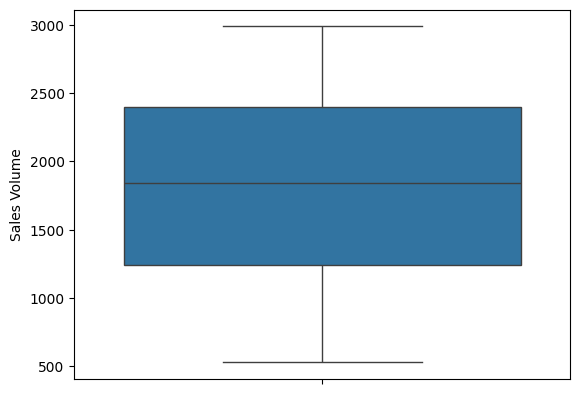

In [44]:
sns.boxplot(df['Sales Volume'])

<Axes: ylabel='price'>

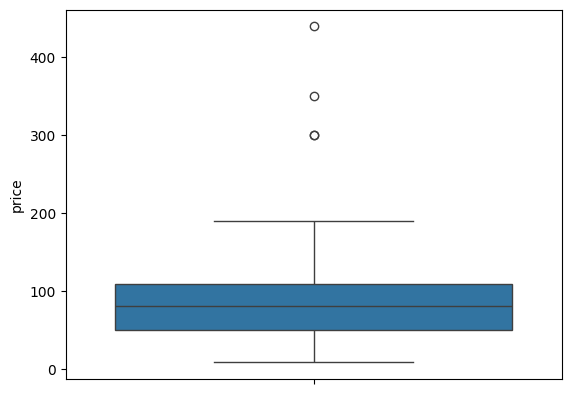

In [45]:
sns.boxplot(df['price'])

### ✅ Insight:
- No outliers were detected in the Sales Volume feature.
- Significant outliers were identified in the price feature.

## 📏 6. Detect and Remove Outliers Using Z-Score

In [46]:
#using Z score
import numpy as np

outliers = []
data = df['price']
mean = np.mean(data)
std = np.std(data)
threshold = 3

for i in data:
  z = (i - mean)/std
  if np.abs(z) > threshold:
    outliers.append(i)

print(outliers)

[439.0, 299.0, 349.0, 299.0]


In [47]:
print(df[df['price'].isin(outliers)])

    Product ID Product Position Promotion Seasonal  Sales Volume  \
13      151396   Front of Store       Yes      Yes           729   
22      161909            Aisle       Yes       No          1290   
38      114877            Aisle        No       No          1860   
60      151925          End-cap       Yes      Yes          2179   

                                    name  price    terms section  
13                CROPPED LEATHER JACKET  439.0  jackets     MAN  
22                        LEATHER JACKET  299.0  jackets     MAN  
38                          SUEDE JACKET  349.0  jackets     MAN  
60  VINTAGE EFFECT LEATHER BOMBER JACKET  299.0  jackets     MAN  


In [48]:
df = df[~df['price'].isin(outliers)]
print(df.shape)

(248, 9)


### ✅ Insight:
- Outliers were detected using the Z-score method with a threshold of 3.

- These outliers, ranging from 2.5 to 4 times higher than the typical values, were removed to improve data quality.

## 💾 7. Export Cleaned Data

In [49]:
df.to_csv('Zara_sales.csv', index=False)

## 🧮 8. Convert Categorical to Numeric for Correlation Analysis

In [50]:
df.describe()

,Product ID,Sales Volume,price
count,248.000000,248.000000,248.000000
mean,153505.080645,1828.689516,82.055000
std,26251.003313,698.661204,39.864048
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151806.000000,1839.500000,69.945000
75%,176111.750000,2408.250000,109.000000
max,199631.000000,2989.000000,189.000000


In [51]:
non_numeric_cols = df.select_dtypes(exclude='number').columns
print("Non-numeric columns excluded:", non_numeric_cols.tolist())

Non-numeric columns excluded: ['Product Position', 'Promotion', 'Seasonal', 'name', 'terms', 'section']


In [52]:
copy_df = df.copy()

position_map = {'Aisle': 1, 'End-cap': 2, 'Front of Store': 3}
bool_map = {'Yes': 1, 'No': 0}

copy_df['Product Position'] = df['Product Position'].map(position_map)
copy_df['Promotion'] = df['Promotion'].map(bool_map)
copy_df['Seasonal'] = df['Seasonal'].map(bool_map)

correlation_matrix = copy_df.select_dtypes(include='number').corr()
print(correlation_matrix)

                  Product ID  Product Position  Promotion  Seasonal  \
Product ID          1.000000          0.079384   0.116665 -0.058930   
Product Position    0.079384          1.000000  -0.012690 -0.053032   
Promotion           0.116665         -0.012690   1.000000 -0.007166   
Seasonal           -0.058930         -0.053032  -0.007166  1.000000   
Sales Volume       -0.120866          0.026250   0.012816 -0.001641   
price              -0.061146         -0.006823   0.091813 -0.011704   

                  Sales Volume     price  
Product ID           -0.120866 -0.061146  
Product Position      0.026250 -0.006823  
Promotion             0.012816  0.091813  
Seasonal             -0.001641 -0.011704  
Sales Volume          1.000000 -0.033593  
price                -0.033593  1.000000  


### ✅ Insight:
- Converted categorical variables into numeric formats to enable correlation analysis.
- The resulting correlation matrix indicates minimal multicollinearity — suggesting low interdependence among features, making them suitable for independent modeling and analysis.

## 📈 9. Visual Analysis of Feature Relationships

<ipython-input-53-008752a964e9>:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Promotion', hue='section', data=df, palette=custom_palette, ax=axes[0])
<ipython-input-53-008752a964e9>:21: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Product Position', hue='section', data=df, palette=custom_palette, ax=axes[2])


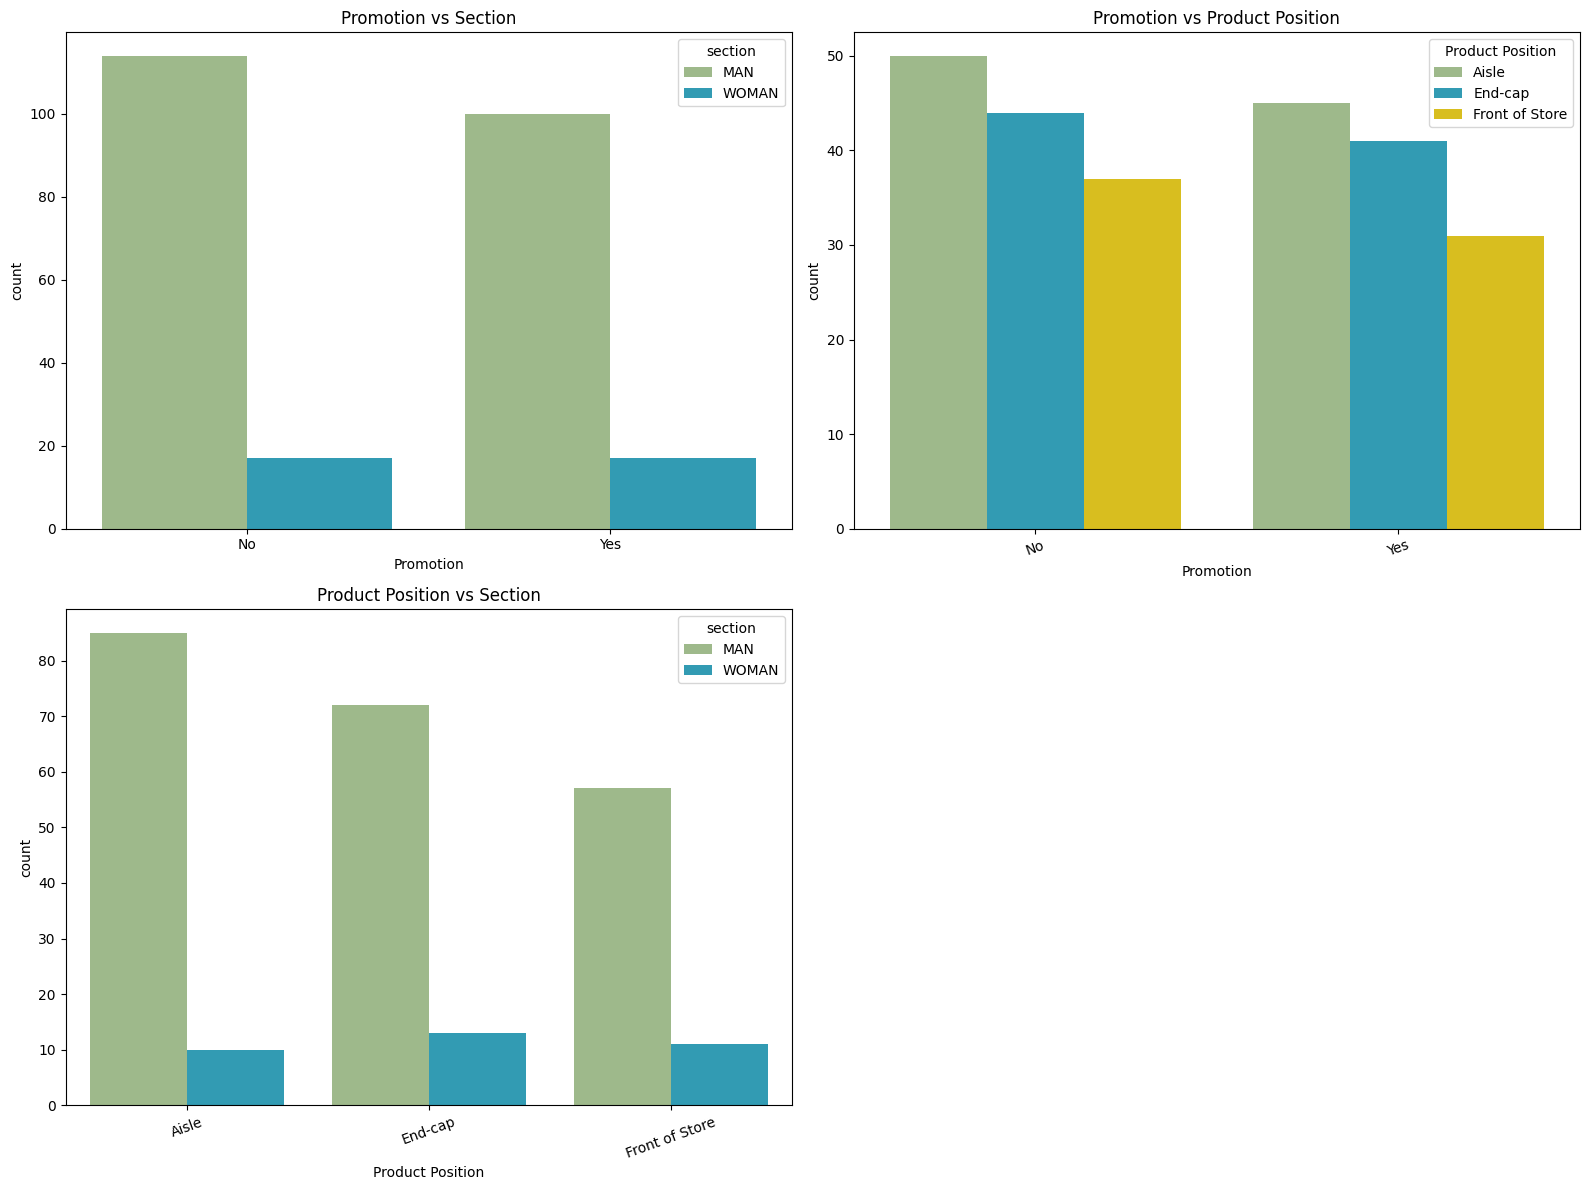

In [53]:
chrome_yellow = "#F7D400"      # Chrome Yellow
sage_green = "#9DC183"         # Sage Green
ocean_blue = "#1CA9C9"         # Ocean Blue

custom_palette = [sage_green, ocean_blue, chrome_yellow]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Promotion vs Section
sns.countplot(x='Promotion', hue='section', data=df, palette=custom_palette, ax=axes[0])
axes[0].set_title('Promotion vs Section')
axes[0].tick_params(axis='x', rotation=0)

# Promotion vs Product Position
sns.countplot(x='Promotion', hue='Product Position', data=df, palette=custom_palette[:3], ax=axes[1])
axes[1].set_title('Promotion vs Product Position')
axes[1].tick_params(axis='x', rotation=20)

# Product Position vs Section
sns.countplot(x='Product Position', hue='section', data=df, palette=custom_palette, ax=axes[2])
axes[2].set_title('Product Position vs Section')
axes[2].tick_params(axis='x', rotation=20)
fig.delaxes(axes[3])

plt.tight_layout()

### ✅ Insight:
- Identified interaction patterns between promotion, position, and store sections.
- No strong associations observed among combinations, limiting actionable conclusions from these relationships.

## 🧾 Conclusion
- The Zara sales dataset was successfully imported, inspected, and cleaned.

- Missing values were minimal, limited to three entries in non-critical columns, and no duplicates were found.

- Irrelevant columns were removed, leaving a refined dataset with only one null entry.

- Outlier analysis showed no anomalies in Sales Volume, but Price had extreme values (2.5x–4x the mean) which were removed using Z-score thresholding.

- Categorical features were converted to numeric for correlation analysis, revealing low inter-feature correlation—indicating minimal multicollinearity.

- Exploratory visualizations showed weak or no significant interactions between product position, promotions, and store sections, suggesting these features may have limited predictive power in isolation.


##The dataset is now clean and well-prepared for modeling or further business analysis, with low redundancy, no severe data quality issues, and minimal feature dependency.